# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt


df = pd.read_csv('data/human_body_temperature.csv')
print(df.columns)
print(df.shape)

Index(['temperature', 'gender', 'heart_rate'], dtype='object')
(130, 3)


Is the distribution of body temperatures normal?
Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test

To prove data is normally distrubuted: 
++ Get mean and STD from the data set
++ Get a sample of normal distribution using this mean and median value 
    np.random.normal(mean,std,size=10000)
++ plot the theorotical CDF and Empirical CDF
++ If both the graphs overlay then the distribution is normal. 

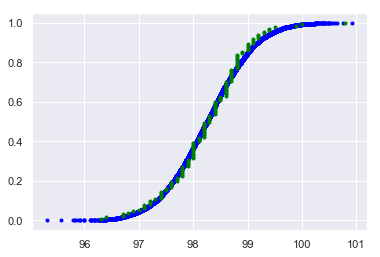

In [71]:
def ecdf(data):
    #Compute ECDF for a one-dimensional array of measurements.
    # Number of data points: n
    n = len(data)   
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1,n+1) / n 
    return x, y


temp_nd_samples = np.random.normal(df['temperature'].mean(), 
                                 df['temperature'].std(),  
                                 10000)

x, y = ecdf(temp_nd_samples)
x_theor, y_theor = ecdf(df['temperature'])
sns.set()
_ = plt.plot(x,y,marker='.',linestyle='none',color='blue')
_ = plt.plot(x_theor, y_theor, marker='.', linestyle='none', color='green')
plt.show()

The ECDF and normal CDF overlap. Hence the distribution seems to be normal.

Is the sample size large? Are the observations independent?
Remember that this is a condition for the Central Limit Theorem, 
and hence the statistical tests we are using, to apply.

To find whether the observations are independant, calculate covariance between them. 
The covariance factor would help us to decide the independance/dependance of data. 
                                                                  
Regarding the size of the avaiable data. Possibly this can be done.  
++ Do bootstrap replicates for parameteric inference between:
    temperature and gender - test statistic would be linear regression or pearson co-efficient
    temperature and heart_rate - test statistic would be linear regression or pearson co-efficient
++ Calculate confidence interval 95%.  

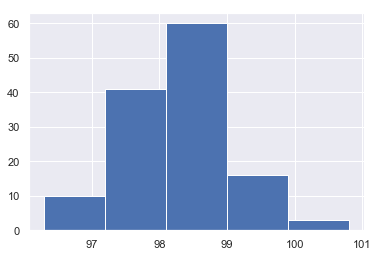

98.24923076923075


In [69]:
sns.set()
_  = plt.hist(df['temperature'],bins=5)
plt.show()
print(df['temperature'].mean())

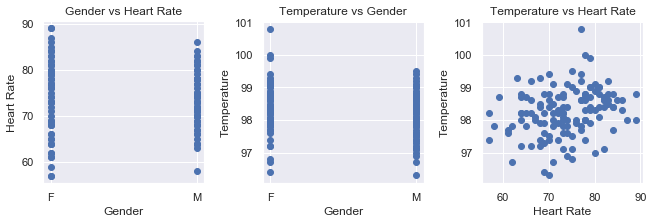

In [59]:
fig, axs = plt.subplots(ncols= 3, figsize=(9,3), constrained_layout=True)
# merging ax1 and ax2 into 1 

axs[0].scatter(df['gender'], df['heart_rate'])
axs[0].set(title='Gender vs Heart Rate', xlabel = 'Gender', ylabel = 'Heart Rate')

axs[1].scatter(df['gender'], df['temperature'])
axs[1].set(title='Temperature vs Gender', xlabel = 'Gender', ylabel = 'Temperature')

axs[2].scatter(df['heart_rate'], df['temperature'])
axs[2].set(title='Temperature vs Heart Rate', xlabel = 'Heart Rate', ylabel = 'Temperature')

plt.show()
    

As we can observe in the subplots above, there seems to be no correlation between the any of the three parameters. 

In [ ]:
Determining whether the size of sample is large enough or not ? 
We shall  check the standard error of the mean to determine the value of n.
Assuming a sample size of 100, we get a standard error of mean around 0.0733
which is a good estimate to say that the sample size(n=130) is large enough. 

In [80]:
print(df['temperature'].std()/np.sqrt([100]))

[0.07331832]


In [ ]:
Is the true population mean really 98.6 degrees F?
Null Hypothesis: "Population mean not equal to 98.6 degrees F"
++ Do bootstrapping with test statistic being "difference in mean and 98.6"
++ p value calculation: np.sum(bs_replicates <= 98.6)/len(bs_replicates)

Would you use a one-sample or two-sample test? Why?
One-sample test since we are comparing the sample mean to a population mean 
wherein we only have the sample data.

In this situation, is it appropriate to use the  t or  z statistic?
We shall use the z-statistic since the sample size is large enough. 
As per theory, t-statistic should be used for sample size of less than 30  

Now try using the other test. How is the result be different? Why?
what is "other" in this context. 
Is it a the other frequentist testing i.e. t-statistic 
or does it refer to other testing technique like "frequentist test" 
in comparision to bootstrap hypothesis testing 



P value: 0.0


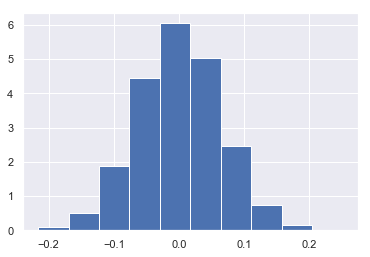

In [110]:
# Bootstrap hypothesis test
# Null Hypothesis: True population mean for human body temperature is not 98.6 degree F
# Alternate Hypothesis: True population mean for human body temperature is 98.6 degree F
# we only have one data set and a mean value to compare with
# test statistic will be difference in the  sample mean and population mean(98.6) of 98.6 
# For p value calulation: since sample mean(98.2) is < population mean(98.6) we will use 
# less than equal to <=
def draw_bs_replicates(data, func, size=1, sample_size= -1):    
    
    bs_replicates = np.empty(size)
    if sample_size == -1:
        sample_size = len(data)
    for i in range(size):
        #Generate sample
        bs = np.random.choice(data, sample_size)
        bs_replicates[i] = func(bs)
   
    return bs_replicates



expected_mean = 98.6
# we shall prepare the required sample by adjusting the mean.
shifted_sample = df['temperature'] - df['temperature'].mean() + expected_mean
bs_replicates = draw_bs_replicates(shifted_sample, np.mean, 10000)
bs_replicates = bs_replicates - 98.6
# p value
p = np.sum(bs_replicates <= (df['temperature'].mean() - 98.6))/len(bs_replicates)
print("P value:", p)
_ = plt.hist(bs_replicates, bins=10, density=True)
plt.show()    
    
## The histogram indicates that the difference between the means for ever given sample is a very small +ve number. 
## Hence the p value is 0.0 
## Thus the Null Hypothesis is not True. Hence the Alternate Hypothesis is 
##justified


In [ ]:
Draw a small sample of size 10 from the data and repeat both frequentist tests.
Which one is the correct one to use?
What do you notice? What does this tell you about the difference in application of the
t and zstatistic?

In [ ]:
At what temperature should we consider someone's temperature to be "abnormal"?
As in the previous example, try calculating everything using the boostrap approach, 
as well as the frequentist approach.
Start by computing the margin of error and confidence interval. 
When calculating the confidence interval, keep in mind that you should use the appropriate formula 
for one draw, and not N draws.
Does the one draw mean we have to calculate the confidence interval on the actual sample itself.

In [121]:
# Doing the Computations by bootstrapping:
bs_replicates = draw_bs_replicates(df['temperature'], np.mean, 1000)
#_ = plt.hist(bs_replicates, bins=10)
#plt.show()
percentiles = np.percentile(bs_replicates, [2.5,97.5])
percentiles_sample = np.percentile(df['temperature'], [2.5,97.5])
print(percentiles, percentiles_sample)
#Based on the confidence interval any x < 96.7225 and x > 99.4775 is considered abnormal. 

[98.12146154 98.37696154] [96.7225 99.4775]


In [ ]:
Is there a significant difference between males and females in normal temperature?
What testing approach did you use and why?
Write a story with your conclusion in the context of the original problem.

In [128]:
# Null Hypothesis: There is no significant differenece between Male and Female  
#                  temperatures. 
# We use permuattion based replicates
def mean_difference(data_1, data_2):
    return data_1.mean() - data_2.mean()


def draw_perm_replicates(data_1, data_2, func, size=1):
    
    data = np.concatenate([data_1, data_2])
    perm_replicates = np.empty(size)
    
    for i in range(size):
        perm_data = np.random.permutation(data)
        x = perm_data[:len(data_1)]
        y = perm_data[len(data_1):]
        perm_replicates[i] = func(x, y)
    
    return perm_replicates
        
                
males = df[df['gender'] == 'M']['temperature']
females = df[df['gender'] == 'F']['temperature']

perm_replicates = draw_perm_replicates(males, females, mean_difference, 10000)
mean_diff = mean_difference(males, females)

p = np.sum(perm_replicates >= mean_diff)/len(perm_replicates)
print(p)



0.8572


In [ ]:
Since the p value is significant it indicates that the null hypothesis is true. 
Hence male and female temperature distrubutions are identical. 